<a href="https://colab.research.google.com/github/AyaFergany/CodeClause_Sales_Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from datetime import timedelta
import datetime as dt
import time 
import os

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
customer = pd.read_csv('/content/drive/MyDrive/dataset#/Customer.csv')
transactions = pd.read_csv('/content/drive/MyDrive/dataset#/Transactions.csv')
prod_cat_info = pd.read_csv('/content/drive/MyDrive/dataset#/prod_cat_info.csv')

# Data Preprocessing

In [88]:
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [89]:
#To fix this, I applied ffill (fill forward) to the null cells
customers = customer.fillna({
    'Gender': customer['Gender'].ffill(),
    'city_code':customer['city_code'].ffill()
})

In [90]:
transactions['tran_date'] = pd.to_datetime(transactions['tran_date'],errors ='coerce')

In [91]:
transactions.insert(loc=3, column='year', value=transactions.tran_date.dt.year)


In [92]:
transactions.insert(loc=4, column='month', value=transactions.tran_date.dt.month)


In [93]:
transactions.insert(loc=5, column='day', value=transactions.tran_date.dt.day)


In [94]:
transactions.head()

,transaction_id,cust_id,tran_date,year,month,day,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,2014-02-28,2014,2,28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,2014,2,27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,2014,2,24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,2014,2,24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,2014,2,23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [95]:
###### Transactions and Product Category datasets have no null cells.
df = pd.merge(left = customers, right = transactions, left_on = 'customer_Id', right_on = 'cust_id').drop('cust_id', axis =1)
#This joins the customers and transactions dataset on customer_Id and cust_id. The duplicate column (cust_id)
#is dropped.
df.duplicated().sum()

13

In [96]:
#There are 13 duplicate cells in the df dataframe. Next step: drop duplicates.

df.drop_duplicates(inplace = True)
df_new = pd.merge(df, prod_cat_info, left_on = ('prod_subcat_code', "prod_cat_code"), right_on = ('prod_sub_cat_code', "prod_cat_code")).drop('prod_sub_cat_code', axis =1)
df_new.shape
#Columns from the prod_cat dataset have been added to the df dataframe
df_new.describe()
#showing basic statistical details


customer_city=df_new[['city_code','customer_Id']]
customer_city.groupby(['city_code'])['customer_Id'].aggregate('count').reset_index().sort_values('customer_Id', ascending=False)

,city_code,customer_Id
3,4.0,2430
2,3.0,2410
4,5.0,2357
6,7.0,2356
9,10.0,2333
7,8.0,2328
1,2.0,2268
0,1.0,2255
8,9.0,2176
5,6.0,2127


In [97]:
rdf = df_new[df_new['Qty'] <= -1]
sdf = df_new[df_new['Qty'] >= 0]
"""To analyze negative and positive order values seperately, 2 new datasets were created."""

'To analyze negative and positive order values seperately, 2 new datasets were created.'

#1. Returned Orders Per Store Category



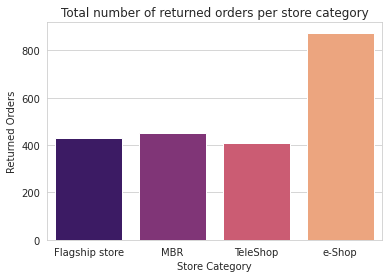

In [98]:
"""The e-shop accounted for the most returns in the returned orders dataset."""
orders = rdf.groupby(by=['Store_type'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.barplot(x = "Store_type", y = 'Qty', data = orders,  palette= "magma")
plt.xlabel('Store Category')
plt.ylabel('Returned Orders')
plt.title('Total number of returned orders per store category')
plt.show()

#2. Returned Orders Per Product Category


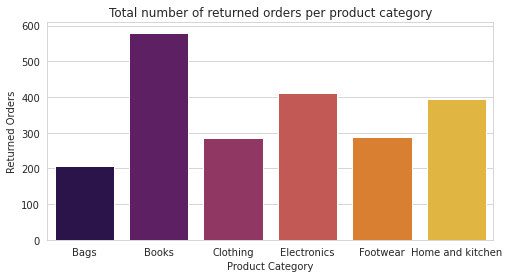

In [99]:
"""Books, Electronics and Home & Kitchen were the most returned product categories."""
category = rdf.groupby(by=['prod_cat'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x = "prod_cat", y = 'Qty', data = category,  palette= "inferno")
plt.xlabel('Product Category')
plt.ylabel('Returned Orders')
plt.title('Total number of returned orders per product category')
plt.show()

#3. Returned Orders By City



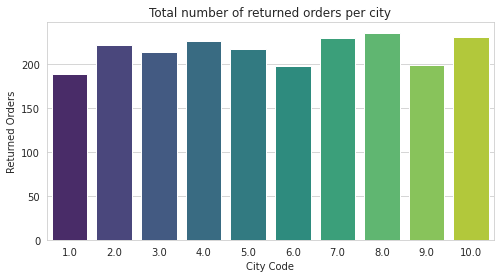

In [100]:
"""Returns across cities were quite similar, with the highest recorded for City Code 8."""
city = rdf.groupby(by= ['city_code'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x = "city_code", y = 'Qty', data = city,  palette= "viridis")
plt.xlabel('City Code')
plt.ylabel('Returned Orders')
plt.title('Total number of returned orders per city')
plt.show()

#4. Returned Orders By Year



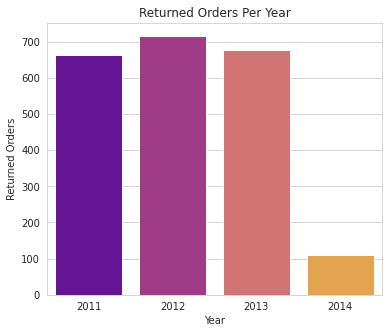

In [101]:
"""The highest product returns were recorded in 2012."""
order_year = rdf.groupby(by=['year'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'Qty', data = order_year,  palette= "plasma")
plt.xlabel('Year')
plt.ylabel('Returned Orders')
plt.title('Returned Orders Per Year')
plt.show()


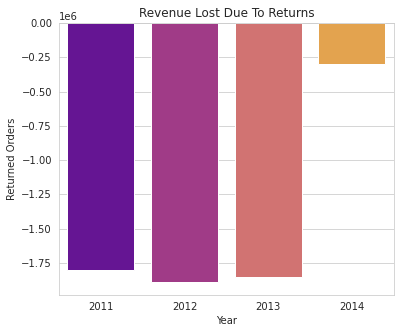

In [102]:
"""Chart below shows revenue loss."""
sales = rdf.groupby(by=['year'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'total_amt', data = sales,  palette = 'plasma')
plt.xlabel('Year')
plt.ylabel('Returned Orders')
plt.title('Revenue Lost Due To Returns')
plt.show()

#1. Total Orders Per Store Category



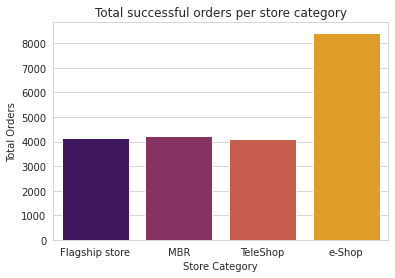

In [103]:
"""The most purchases were made through the e-shop."""
orders1 = sdf.groupby(by=['Store_type'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,4))
sns.set_style('whitegrid')
sns.barplot(x = "Store_type", y = 'Qty', data = orders1,  palette= "inferno")
plt.xlabel('Store Category')
plt.ylabel('Total Orders')
plt.title('Total successful orders per store category')
plt.show()

#2. Total Orders Per Product Category



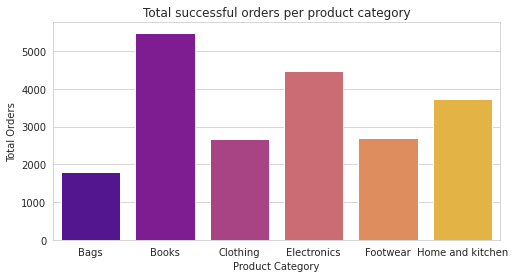

In [104]:
"""Books, Electronics and Home & Kitchen were the most purchased product categories."""
category1 = sdf.groupby(by=['prod_cat'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x = "prod_cat", y = 'Qty', data = category1,  palette= "plasma")
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.title('Total successful orders per product category')
plt.show()

#3. Total Successful Orders Per City



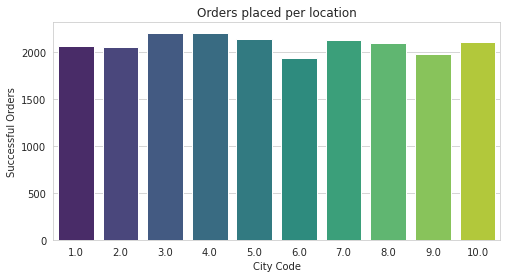

In [105]:
location1 = sdf.groupby(by= ['city_code'], as_index = False)['Qty'].count()
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.barplot(x = "city_code", y = 'Qty', data = location1,  palette= "viridis")
plt.xlabel('City Code')
plt.ylabel('Successful Orders')
plt.title('Orders placed per location')
plt.show()

#5. Total Orders Per Year



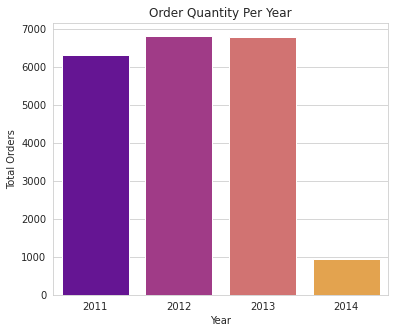

In [106]:
"""Highest sales occured in the years 2012 and 2013."""
order_year1 = sdf.groupby(by=['year'], as_index = False)['Qty'].count()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'Qty', data = order_year1,  palette= "plasma")
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Order Quantity Per Year')
plt.show()

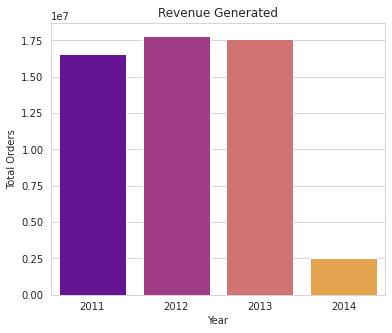

In [107]:
"""The most successful sales occured in 2012 and 2013"""
sales1 = sdf.groupby(by=['year'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(6,5))
sns.barplot(x = "year", y = 'total_amt', data = sales1,  palette= "plasma")
plt.xlabel('Year')
plt.ylabel('Total Orders')
plt.title('Revenue Generated')
plt.show()

#6. Revenue Per Category



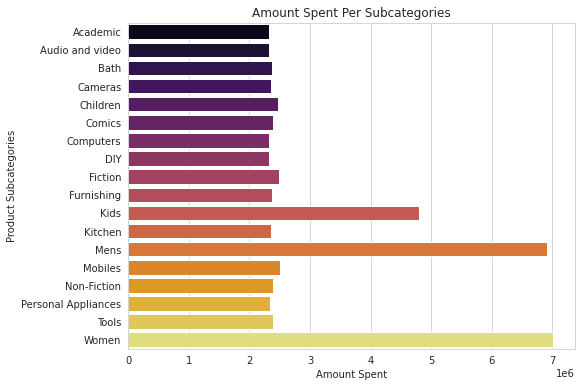

In [108]:
"""Products in the Women, Mens and Kids categories sold better than other categories."""
subcategory = sdf.groupby(by=['prod_subcat'], as_index = False)['total_amt'].sum()
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.barplot(x = "total_amt", y = 'prod_subcat', data = subcategory, palette= "inferno")
plt.xlabel('Amount Spent')
plt.ylabel('Product Subcategories')
plt.title('Amount Spent Per Subcategories')
plt.show()

#7. Purchase By Gender



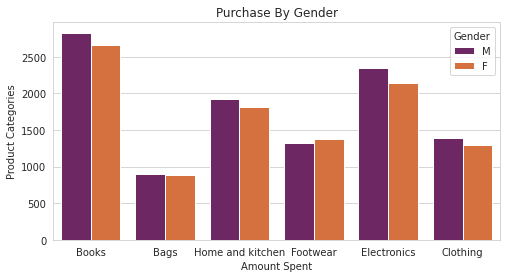

In [109]:
"""Purchases by men accounted for the highest percentage across all product categories except footwear and bags."""
plt.figure(figsize=(8,4))
sns.set_style('whitegrid')
sns.countplot(x = 'prod_cat', hue = "Gender", data = sdf, palette= "inferno")
plt.xlabel('Amount Spent')
plt.ylabel('Product Categories')
plt.title('Purchase By Gender')
plt.show()

In [110]:
"""Pivot chart representation"""
product_by_gender = sdf.groupby(["Gender","prod_cat"])[["Qty"]].sum().reset_index()
product_by_gender.pivot(index="Gender",columns="prod_cat",values="Qty")

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2693,7957,3893,6405,4158,5482
M,2657,8453,4175,7153,3971,5704


#7. Quantity Sold By Month



1     1869
10    1828
9     1789
3     1785
7     1746
12    1737
8     1729
11    1710
2     1687
5     1677
6     1666
4     1653
Name: month, dtype: int64

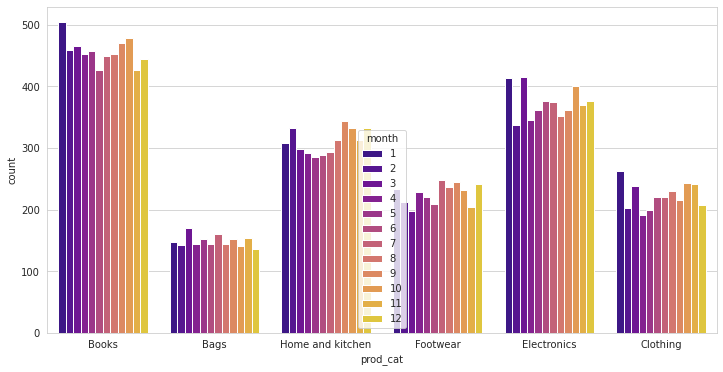

In [111]:
"""Showing category sales by month."""
plt.figure(figsize=(12,6))
sns.countplot(x = 'prod_cat', hue = 'month', data = sdf, palette= "plasma")

sale_by_month = sdf.groupby(['month','prod_cat'])['Qty'].count().reset_index()
sale_by_month.pivot(index = "month", columns = "prod_cat", values = 'Qty').round(0)

sdf['month'].value_counts()